# Task 2

---


# Outline
* [Introduction](#introduction)
* [Exploratory Data Analysis](#exploratory-data-analysis)
* [Feature Engineering](#feature-engineering)
* [Feature Selection](#feature-selection)
* [Model Development](#model-development)
* [Feature Importance](#feature-importance)
* [Conclusion](#conclusion)
---


## Introduction
This Jupyter notebook includes code that carries out a predictive modeling of customer bookings. It starts by effectively cleaning, manipulating and analyzing the booking data from British Airways with the final aim of creating a predictive modeling off the dataset. Important features neccessary for the success of this model will also be outlined.

## Exploratory data analysis

---

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
#Basics
import pandas as pd
import numpy as np
import warnings
import string
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

#Visualization
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import matplotlib.pyplot as plt
plt.rc("font", size=14)

#SKLearn ML
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RepeatedStratifiedKFold, StratifiedKFold
from sklearn.metrics import f1_score, recall_score, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_score, precision_recall_curve, ConfusionMatrixDisplay, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.svm import SVC
import category_encoders as ce
import pycountry_convert as pc

# to save model
#import pickle

In [2]:
booking = pd.read_csv("data/customer_booking.csv", encoding="ISO-8859-1")
booking.head()
df = booking.copy()

The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

## Descriptive statistics of data

---
### Data types

It is useful to first understand the data that you're dealing with along with the data types of each column. The data types may dictate how you transform and engineer features.

To get an overview of the data types within a data frame, use the `info()` method.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a brief column description:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

In [4]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

Going forward, i will explore the dataset with some visualisations and other useful metrics and prepare the dataset for predictive modeling. This will be capped b train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [5]:
df.corr()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
num_passengers,1.000000,0.212606,-0.115850,0.015607,0.120404,0.028544,0.022943,-0.063169,0.024116
purchase_lead,0.212606,1.000000,-0.076560,0.035973,-0.022207,-0.004499,-0.022653,0.067866,-0.022131
length_of_stay,-0.115850,-0.076560,1.000000,-0.024872,0.176757,0.032264,0.098828,0.141181,-0.042408
flight_hour,0.015607,0.035973,-0.024872,1.000000,-0.011434,0.012171,0.013014,-0.002101,0.007127
wants_extra_baggage,0.120404,-0.022207,0.176757,-0.011434,1.000000,0.207669,0.216470,0.057054,0.068139
wants_preferred_seat,0.028544,-0.004499,0.032264,0.012171,0.207669,1.000000,0.315088,0.101289,0.050116
wants_in_flight_meals,0.022943,-0.022653,0.098828,0.013014,0.216470,0.315088,1.000000,0.154312,0.026511
flight_duration,-0.063169,0.067866,0.141181,-0.002101,0.057054,0.101289,0.154312,1.000000,-0.106266
booking_complete,0.024116,-0.022131,-0.042408,0.007127,0.068139,0.050116,0.026511,-0.106266,1.000000


In [6]:
# let's check the unique values in each column
df.nunique()

num_passengers             9
sales_channel              2
trip_type                  3
purchase_lead            470
length_of_stay           335
flight_hour               24
flight_day                 7
route                    799
booking_origin           104
wants_extra_baggage        2
wants_preferred_seat       2
wants_in_flight_meals      2
flight_duration           21
booking_complete           2
dtype: int64

## Feature Engineering

---


In [7]:
# extracting continents from the booking_origin column.
# this will improve the model's accuracy

def get_continent(row):
    try:
        country_code = pc.country_name_to_country_alpha2(row['booking_origin'], cn_name_format="default")
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        return pc.convert_continent_code_to_continent_name(continent_code)
    except:
        return None


df['Continent'] = df.apply(get_continent, axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
 14  Continent              49862 non-null  object 
dtypes:

In [9]:
#pd.set_option('display.max_rows', None)
#
#df.query('Continent == "Unknown"')

In [10]:
# Create a dictionary to map countries to continents for countries not covered by pycountry_convert
country_to_continent = {
    'Myanmar (Burma)': 'Asia',
    'Svalbard & Jan Mayen': 'Oceania',
    'Timor-Leste': 'Asia'
}

# Add a new column for the continent and set its value based on the country
df['Continent_manual'] = df['booking_origin'].map(country_to_continent)

# using fillna to fill in missing values from manual mapping
df['Continent'] = df['Continent'].fillna(df['Continent_manual'])

# Drop the 'Continent_manual' column since we don't need it anymore
df = df.drop('Continent_manual', axis=1)

In [11]:
# drop (not set) values in the booking_origin column
df = df[~df['booking_origin'].str.contains("(not set)", case=False)]

In [12]:
df['Continent'].unique()

array(['Oceania', 'Asia', 'Europe', 'Africa', 'North America',
       'South America'], dtype=object)

In [13]:
# Use crosstab to create separate columns for each unique value in the 'Continent' column
dummies_df = pd.crosstab(df.index, df['Continent'])

# Concatenate the dummies dataframe with the original dataframe along the columns axis
df = pd.concat([df, dummies_df], axis=1)

# Rename the new columns for clarity
#df.rename(columns={'Asia': 'booking_origin_Asia', 'Europe': 'booking_origin_Europe', 'Africa': 'booking_origin_Africa', 'North America': 'booking_origin_North_America', 
                   #'South America': 'booking_origin_South_America', 'Oceania': 'booking_origin_Oceania', 'Antarctica': 'Booking_origin_Antarctica'}, inplace=True)

In [14]:
# Use crosstab to create separate columns for each unique value in the 'Sales_column' column
dummies_df = pd.crosstab(df.index, df['sales_channel'])

# Concatenate the dummies dataframe with the original dataframe along the columns axis
df = pd.concat([df, dummies_df], axis=1)

# Rename the new columns for clarity
df.rename(columns={'Internet': 'internet_sales', 'Mobile': 'mobile_sales'}, inplace=True)

In [15]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,Continent,Africa,Asia,Europe,North America,Oceania,South America,internet_sales,mobile_sales
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0,Oceania,0,0,0,0,1,0,1,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0,Oceania,0,0,0,0,1,0,1,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0,Asia,0,1,0,0,0,0,1,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0,Oceania,0,0,0,0,1,0,1,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0,Asia,0,1,0,0,0,0,1,0


In [16]:
# Use crosstab to create separate columns for each unique value in the 'trip_type' column
dummies_df = pd.crosstab(df.index, df['trip_type'])

# Concatenate the dummies dataframe with the original dataframe along the columns axis
df = pd.concat([df, dummies_df], axis=1)

# Rename the new columns for clarity
#df.rename(columns={'RoundTrip': 'internet_sales', 'Mobile': 'mobile_sales'}, inplace=True)

In [17]:
# Use crosstab to create separate columns for each unique value in the 'flight_day' column
dummies_df = pd.crosstab(df.index, df['flight_day'])

# Concatenate the dummies dataframe with the original dataframe along the columns axis
df = pd.concat([df, dummies_df], axis=1)

# Rename the new columns for clarity
df.rename(columns={'Mon': 'monday_flight', 'Tue': 'tuesday_flight', 'Wed': 'wednesday_flight', 
                   'Thu': 'thursday_flight', 'Fri': 'friday_flight', 'Sat': 'saturday_flight', 'Sun': 'sunday_flight'}, inplace=True)

Recall from the data type output earlier, `sales_channel`, `trip_type`, `flight_day`, `route`, `booking_origin` are of the object dataypes and has to be changed.

In [18]:
df.route.nunique()

799

In [19]:
df['route'] = df['route'].astype(str)
df.drop(['booking_origin', 'flight_day', 'sales_channel', 'trip_type', 'sales_channel', 'Continent'], axis=1, inplace=True)

In [20]:
df.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,route,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,Africa,Asia,Europe,North America,Oceania,South America,internet_sales,mobile_sales,CircleTrip,OneWay,RoundTrip,friday_flight,monday_flight,saturday_flight,sunday_flight,thursday_flight,tuesday_flight,wednesday_flight
0,2,262,19,7,AKLDEL,1,0,0,5.52,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0
1,1,112,20,3,AKLDEL,0,0,0,5.52,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0
2,2,243,22,17,AKLDEL,1,1,0,5.52,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
3,1,96,31,4,AKLDEL,0,0,1,5.52,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0
4,2,68,22,15,AKLDEL,1,0,1,5.52,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1


In [21]:
# creating a checkpoint
df.to_csv("data/preprocessed")

In [22]:
df = pd.read_csv("data/preprocessed")

In [23]:
df.head()

,Unnamed: 0,num_passengers,purchase_lead,length_of_stay,flight_hour,route,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,Africa,Asia,Europe,North America,Oceania,South America,internet_sales,mobile_sales,CircleTrip,OneWay,RoundTrip,friday_flight,monday_flight,saturday_flight,sunday_flight,thursday_flight,tuesday_flight,wednesday_flight
0,0,2,262,19,7,AKLDEL,1,0,0,5.52,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0
1,1,1,112,20,3,AKLDEL,0,0,0,5.52,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0
2,2,2,243,22,17,AKLDEL,1,1,0,5.52,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
3,3,1,96,31,4,AKLDEL,0,0,1,5.52,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0
4,4,2,68,22,15,AKLDEL,1,0,1,5.52,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1


In [24]:
df.columns

Index(['Unnamed: 0', 'num_passengers', 'purchase_lead', 'length_of_stay',
       'flight_hour', 'route', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete',
       'Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America',
       'internet_sales', 'mobile_sales', 'CircleTrip', 'OneWay', 'RoundTrip',
       'friday_flight', 'monday_flight', 'saturday_flight', 'sunday_flight',
       'thursday_flight', 'tuesday_flight', 'wednesday_flight'],
      dtype='object')

In [25]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [26]:
# create a dataframe to encode

encoder2= ce.BinaryEncoder(cols=['route'], return_df=True)
df_encoded = encoder2.fit_transform(df)
df_encoded

,num_passengers,purchase_lead,length_of_stay,flight_hour,route_0,route_1,route_2,route_3,route_4,route_5,route_6,route_7,route_8,route_9,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,Africa,Asia,Europe,North America,Oceania,South America,internet_sales,mobile_sales,CircleTrip,OneWay,RoundTrip,friday_flight,monday_flight,saturday_flight,sunday_flight,thursday_flight,tuesday_flight,wednesday_flight
0,2,262,19,7,0,0,0,0,0,0,0,0,0,1,1,0,0,5.52,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0
1,1,112,20,3,0,0,0,0,0,0,0,0,0,1,0,0,0,5.52,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0
2,2,243,22,17,0,0,0,0,0,0,0,0,0,1,1,1,0,5.52,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
3,1,96,31,4,0,0,0,0,0,0,0,0,0,1,0,0,1,5.52,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0
4,2,68,22,15,0,0,0,0,0,0,0,0,0,1,1,0,1,5.52,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49911,2,27,6,9,1,0,0,1,1,1,1,1,1,0,1,0,1,5.62,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0
49912,1,111,6,4,1,0,0,1,1,1,1,1,1,0,0,0,0,5.62,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0
49913,1,24,6,22,1,0,0,1,1,1,1,1,1,0,0,0,1,5.62,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0
49914,1,15,6,11,1,0,0,1,1,1,1,1,1,0,1,0,1,5.62,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0


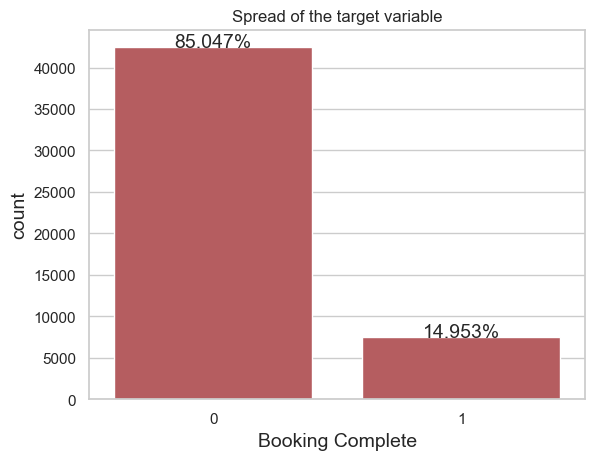

In [27]:
# show the distribution of the target column
ax = sns.countplot(data = df, x = 'booking_complete',  color= sns.color_palette()[3], order = df.booking_complete.value_counts().index)
total = len(df)
for p in ax.patches:
    percentage = '{:.3f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()+0.5
    ax.annotate(percentage, (x, y),ha='center')
plt.xlabel('Booking Complete')
plt.title('Spread of the target variable')
plt.show()

This plot shows that the target variable is highly imbalance as 85% didn't complete the booking while only 14.95% completed, this has to be addressed before building a model as a model is as balanced as the dataset used in it's training.

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49916 entries, 0 to 49915
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         49916 non-null  int64  
 1   purchase_lead          49916 non-null  int64  
 2   length_of_stay         49916 non-null  int64  
 3   flight_hour            49916 non-null  int64  
 4   route                  49916 non-null  object 
 5   wants_extra_baggage    49916 non-null  int64  
 6   wants_preferred_seat   49916 non-null  int64  
 7   wants_in_flight_meals  49916 non-null  int64  
 8   flight_duration        49916 non-null  float64
 9   booking_complete       49916 non-null  int64  
 10  Africa                 49916 non-null  int64  
 11  Asia                   49916 non-null  int64  
 12  Europe                 49916 non-null  int64  
 13  North America          49916 non-null  int64  
 14  Oceania                49916 non-null  int64  
 15  So

In [29]:
# using SMOTE to solve the imbalance by up-sampling the lesser outcome
new_x = df_encoded.loc[:, df_encoded.columns != 'booking_complete']
new_y = df_encoded.loc[:, df_encoded.columns == 'booking_complete']

from imblearn.over_sampling import SMOTE
os= SMOTE(random_state=0)
x_train, x_test, y_train, y_test = train_test_split(new_x, new_y, test_size=0.3, random_state=0)
columns = x_train.columns

os_data_x,os_data_y = os.fit_resample(x_train, y_train)
os_data_x = pd.DataFrame(data=os_data_x, columns=columns)
os_data_y= pd.DataFrame(data=os_data_y, columns=['booking_complete'])
#we can Check the numbers of our data
print("length of oversampled data is ", len(os_data_x))
print("Number of no subscription in oversampled data", len(os_data_y[os_data_y['booking_complete']==0]))
print("Proportion of no subscription data in oversampled data is", len(os_data_y[os_data_y['booking_complete']==0])/len(os_data_x))
print("proportion of subscription data in oversampled data is", len(os_data_y[os_data_y['booking_complete']==1])/len(os_data_x))

length of oversampled data is  59426
Number of no subscription in oversampled data 29713
Proportion of no subscription data in oversampled data is 0.5
proportion of subscription data in oversampled data is 0.5


In [30]:
os_data_x

,num_passengers,purchase_lead,length_of_stay,flight_hour,route_0,route_1,route_2,route_3,route_4,route_5,route_6,route_7,route_8,route_9,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Africa,Asia,Europe,North America,Oceania,South America,internet_sales,mobile_sales,CircleTrip,OneWay,RoundTrip,friday_flight,monday_flight,saturday_flight,sunday_flight,thursday_flight,tuesday_flight,wednesday_flight
0,2,62,4,11,0,1,0,0,0,0,1,0,1,0,1,1,1,6.620000,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0
1,1,89,27,23,1,0,0,0,1,0,1,1,1,0,1,1,1,8.830000,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0
2,1,5,19,4,0,1,1,0,1,0,0,1,0,1,0,0,1,6.330000,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
3,1,6,4,6,1,0,1,0,1,0,0,1,0,1,0,0,0,4.670000,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
4,1,19,30,11,0,1,1,0,0,0,0,1,0,1,1,0,0,8.580000,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59421,2,281,18,2,0,0,0,0,0,0,0,1,1,1,1,0,1,8.830000,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
59422,1,15,31,13,0,0,1,1,0,0,1,0,0,0,1,0,0,4.737248,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
59423,1,1,29,13,0,1,0,1,1,1,0,0,0,0,0,0,0,6.608135,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
59424,1,31,17,5,0,0,0,1,0,0,0,0,1,1,1,0,0,6.722383,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0


In [31]:
os_data_y

,booking_complete
0,0
1,0
2,0
3,0
4,0
...,...
59421,1
59422,1
59423,1
59424,1


### Feature Selection

---

In [32]:
# lets use RfE to find out the best and worst performing feature of the dataset
# RFE sets a feature aside and repeat the rocess with the rest of the feature.
df_encoded_vars = df_encoded.columns.values.tolist()
y=['booking_complete']
x = [i for i in df_encoded_vars if i not in y]

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
rfe = RFE(logreg, step=20)
rfe = rfe.fit(os_data_x, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)


[False False False False  True  True  True False False False False  True
  True False  True False False False False  True  True False  True False
 False  True False False  True  True  True  True  True  True  True  True]
[2 2 2 2 1 1 1 2 2 2 2 1 1 2 1 2 2 2 2 1 1 2 1 2 2 1 2 2 1 1 1 1 1 1 1 1]


In [33]:
# Define the estimator (model) that you want to use for feature selection
estimator = RandomForestClassifier()

# Define the number of features you want to select
num_features = 20

# Initialize the RFE object with the chosen estimator and number of features
selector = RFE(estimator, n_features_to_select=num_features)

# Fit the selector on the data to perform feature selection
selector.fit(os_data_x,os_data_y)

# Get the selected features
selected_features = os_data_x.columns[selector.support_]
selected_features


Index(['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'route_0', 'route_1', 'route_2', 'route_7', 'route_8',
       'flight_duration', 'Asia', 'Oceania', 'mobile_sales', 'friday_flight',
       'monday_flight', 'saturday_flight', 'sunday_flight', 'thursday_flight',
       'tuesday_flight', 'wednesday_flight'],
      dtype='object')

In [54]:
os_data_x.columns

Index(['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'route_0', 'route_1', 'route_2', 'route_3', 'route_4', 'route_5',
       'route_6', 'route_7', 'route_8', 'route_9', 'wants_extra_baggage',
       'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration',
       'Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America',
       'internet_sales', 'mobile_sales', 'CircleTrip', 'OneWay', 'RoundTrip',
       'friday_flight', 'monday_flight', 'saturday_flight', 'sunday_flight',
       'thursday_flight', 'tuesday_flight', 'wednesday_flight'],
      dtype='object')

RFE has helped select these features: 'route_0', 'route_1', 'route_2', 'route_7', 'route_8', 'wants_extra_baggage', 'Asia', 'Europe', 'Oceania' 'mobile_sales' 'RoundTrip', 'friday_flight', 'monday_flight',
       'saturday_flight', 'sunday_flight', 'thursday_flight', 'tuesday_flight',
       'wednesday_flight'

In [55]:
cols=['route_0', 'route_1', 'route_2', 'route_7', 'route_8', 'wants_extra_baggage', 'Asia', 'Europe', 'Oceania', 'mobile_sales' ,'RoundTrip', 'friday_flight', 'monday_flight',
       'saturday_flight', 'sunday_flight', 'thursday_flight', 'tuesday_flight',
       'wednesday_flight']
X = os_data_x[cols]
Y = os_data_y['booking_complete']

In [56]:
pd.set_option('display.max_rows', None)
#implementing the model
import statsmodels.api as sm 
logit_model = sm.Logit(Y,X)
result=logit_model.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.322313
         Iterations 10


<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
====================================================================
Model:               Logit             Pseudo R-squared:  0.535     
Dependent Variable:  booking_complete  AIC:               38343.6039
Date:                2023-03-30 07:13  BIC:               38505.4686
No. Observations:    59426             Log-Likelihood:    -19154.   
Df Model:            17                LL-Null:           -41191.   
Df Residuals:        59408             LLR p-value:       0.0000    
Converged:           1.0000            Scale:             1.0000    
No. Iterations:      10.0000                                        
--------------------------------------------------------------------
                     Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------
route_0             -0.6925   0.0340 -20.3482 0.0000 -0.7592 -0.6258
route_1             -0.8654   0.0290 -29.8339 0.0000 -0.9223 -0.8086
route_2             -0.7098   0.0280 -25.3126 0.0000 -0.7648 -0.6548
route_7             -0.5091   0.0259 -19.6468 0.0000 -0.5599 -0.4583
route_8             -0.3906   0.0256 -15.2815 0.0000 -0.4407 -0.3405
wants_extra_baggage  0.2657   0.0269   9.8609 0.0000  0.2129  0.3185
Asia                -0.9640   0.0611 -15.7721 0.0000 -1.0838 -0.8442
Europe              -2.2753   0.1609 -14.1379 0.0000 -2.5908 -1.9599
Oceania             -2.9774   0.0691 -43.0655 0.0000 -3.1129 -2.8419
mobile_sales        -0.9621   0.0502 -19.1666 0.0000 -1.0605 -0.8638
RoundTrip            7.8606   0.1679  46.8141 0.0000  7.5315  8.1897
friday_flight       -6.5918   0.1608 -41.0034 0.0000 -6.9069 -6.2767
monday_flight       -6.4590   0.1598 -40.4083 0.0000 -6.7723 -6.1457
saturday_flight     -6.5726   0.1615 -40.7028 0.0000 -6.8891 -6.2561
sunday_flight       -6.6427   0.1610 -41.2582 0.0000 -6.9582 -6.3271
thursday_flight     -6.4739   0.1601 -40.4258 0.0000 -6.7877 -6.1600
tuesday_flight      -6.5220   0.1601 -40.7317 0.0000 -6.8358 -6.2082
wednesday_flight    -6.2995   0.1597 -39.4453 0.0000 -6.6125 -5.9865
====================================================================

"""

all has a p-value smaller than 0.05 which is a good thing.

## Model Development

---

Training with Random Forest Classifier

In [57]:
# declare four variables to contain the split outputs
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size = 0.8, random_state = 20) 

In [58]:
# Define your model
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

# Train your model
model.fit(X_train, Y_train)

# Evaluate your model
y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.7879858657243817


In [59]:
# Create an SVM model
clf = svm.SVC(kernel='linear', C=1.0)

# Train the SVM model
clf.fit(X_train, Y_train)

# Test the SVM model
y_pred = clf.predict(X_test)

# Evaluate the performance of the SVM model
accuracy = clf.score(X_test, Y_test)

In [60]:
print('Accuracy:', accuracy)# = clf.score(X_test, Y_test))

Accuracy: 0.8320713444388356


In [61]:
# Create a KNN model
clf = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model
clf.fit(X_train, Y_train)

# Test the KNN model
y_pred = clf.predict(X_test)

# Evaluate the performance of the KNN model
accuracy = clf.score(X_test, Y_test)
print('accuracy:', accuracy )

accuracy: 0.8345953222278311


In [ ]:
# Create a decision tree classifier object
clf = DecisionTreeClassifier() #max_depth, min_samples_split, and criterion

# Train the model on the training set
clf.fit(X_train, Y_train)

# Evaluate the model on the testing set
score = clf.score(X_test, Y_test)

# Print the model's accuracy score
print('Accuracy:', score)

In [ ]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, Y_train)
prediction_xgb = xgb_model.predict(X_test)
xgb_score = accuracy_score(Y_test, prediction_xgb)*100
print(f"The accuracy of the XGBoost Model is {round(xgb_score, 2)}%")

In [ ]:
from yellowbrick.classifier import ClassificationReport
xgb_model = XGBClassifier()
xgb_model = ClassificationReport(xgb_model, support=False)
xgb_model.fit(X_train, Y_train)
xgb_model.score(X_test, Y_test)
xgb_model.show()

In [ ]:
print(classification_report(Y_test, prediction_xgb))

In [62]:
# logistic model fitting
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

LogisticRegression()

In [63]:
# predicting the test set results and calcualting the accuracy
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:2f}'.format(logreg.score(X_test, Y_test)))

Accuracy of logistic regression classifier on test set: 0.859996


In [ ]:
# confusion Matrix
confusion_matrix = confusion_matrix(Y_test, y_pred)
print(confusion_matrix)

In [ ]:
# compute precision, recall, F-measure and support
print(classification_report(Y_test, y_pred))

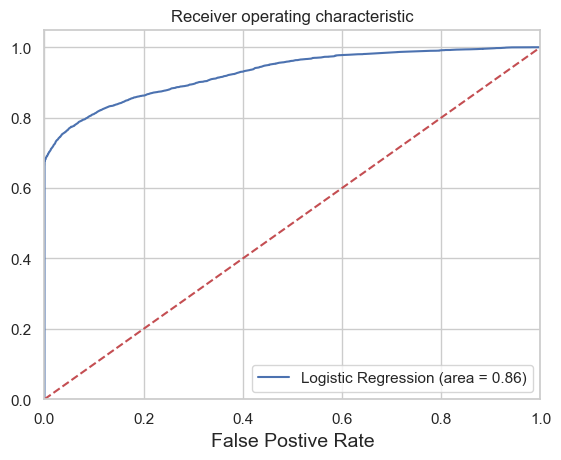

In [66]:
# ROC CUrve
logit_roc_auc = roc_auc_score(Y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr,label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Postive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Here the dotted line represents the ROC curve of a purely random classifier: a good classifier stays as far away from that line as possible

## Feature Importance

---

Having trained trained our model, i use its coef_ attribute to get the coefficients of all the features. These coefficients indicate the importance of each feature in predicting the target variable.

In [64]:
# feature_importance is a NumPy array containing the absolute values of the coefficients.
feature_importance = np.abs(logreg.coef_[0])

# sorted_idx is an array of indices that sorts the features
# based on their importance scores in descending order, and top_features is an array of the indices of the top 10 features
sorted_idx = np.argsort(feature_importance)[::-1]
top_features = sorted_idx[:10]

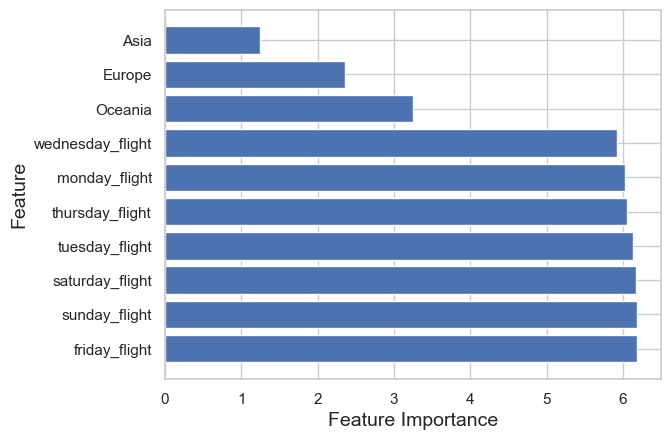

In [65]:
# visualize the feature importances using a bar chart 
feature_names = np.array(X_train.columns)
plt.barh(feature_names[top_features], feature_importance[top_features])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

## Conclusion

---

This model has an accuracy of 86%, going forward, i'd look to improve accuracy by trying out other models. 

*[Back to Top](#task-2)